# PLANTILLA EDA

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## IMPORTAR PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

C:\Users\acrespod\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [10]:
ruta_proyecto = 'C:/proyectos/weather_ohio/'

Nombres de los ficheros de datos.

In [11]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [12]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [5]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [6]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
2,prcp_attributes,OTROS,0.017643
1,prcp_attributes,"T,,W,2400",0.143911
0,prcp_attributes,",,W,2400",0.838446


### Análisis gráfico

In [7]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

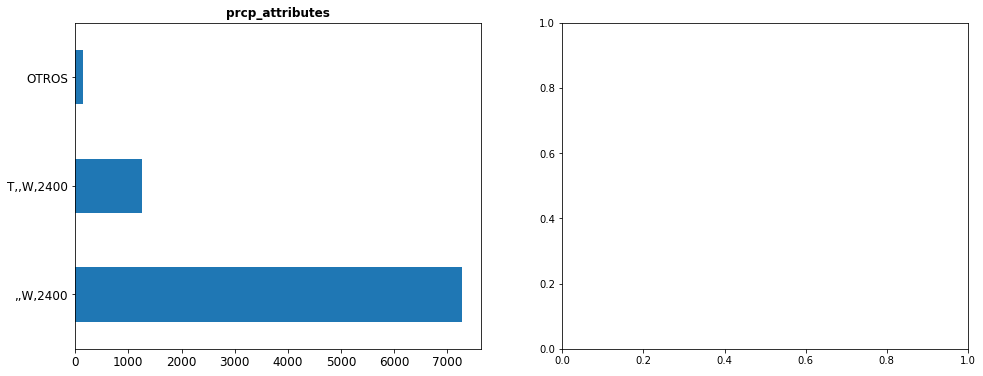

In [8]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [9]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [10]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
awnd,8672.0,7.631846,7.16,3.414218,0.0,5.14,7.16,9.62,23.04
prcp,8672.0,0.102173,0.00,0.232597,0.0,0.00,0.00,0.07,1.40
tmax,8672.0,61.939057,65.00,19.131065,5.0,47.00,65.00,78.00,98.00
tmin,8672.0,43.727168,45.00,16.971253,-10.0,31.00,45.00,58.00,77.00
wdf2,8672.0,213.496022,230.00,87.894627,10.0,170.00,230.00,270.00,360.00
wdf5,8672.0,213.975438,230.00,87.713286,0.0,180.00,230.00,270.00,360.00
wsf2,8672.0,17.731763,16.10,6.343096,0.0,13.00,16.10,21.90,48.00
wsf5,8672.0,23.566634,21.90,9.016566,0.0,17.00,21.90,29.10,70.00


### Análisis gráfico

In [11]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

C:\Users\acrespod\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


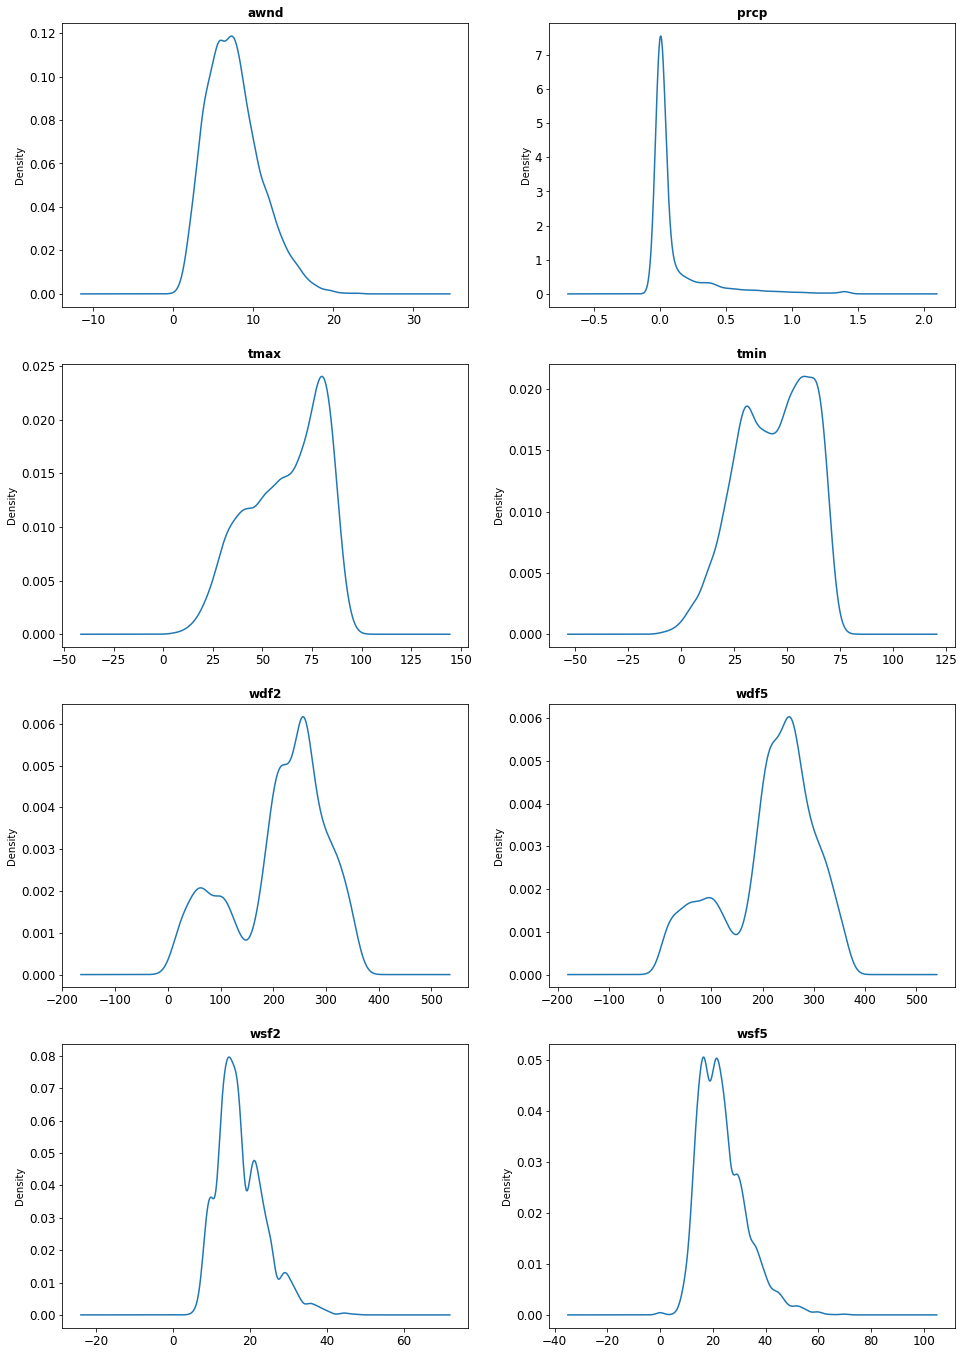

In [12]:
graficos_eda_continuas(num)

In [5]:
num["tmin"] = (num["tmin"] - 32) * 5/9
num["tmax"] = (num["tmax"] - 32) * 5/9

In [6]:
num

,awnd,prcp,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,
1998-03-26,11.63,0.23,25.000000,8.888889,250.0,250.0,29.1,36.0
1998-03-27,11.63,0.23,26.666667,17.777778,250.0,250.0,29.1,36.0
1998-03-28,11.63,0.23,25.555556,16.111111,250.0,250.0,29.1,36.0
1998-03-29,11.63,0.23,26.111111,15.000000,250.0,250.0,29.1,36.0
1998-04-01,11.63,0.23,21.666667,10.000000,250.0,250.0,29.1,36.0
...,...,...,...,...,...,...,...,...
2021-12-27,9.62,0.40,15.000000,1.666667,80.0,280.0,21.9,30.0
2021-12-28,7.38,0.29,11.666667,3.333333,300.0,300.0,21.0,29.1
2021-12-29,4.03,0.05,10.000000,6.111111,230.0,220.0,13.0,16.1


El viento viene mayoritariamente del angulo 250

# Analisis
- si temperatura minima es inferior a -15, no hay precipitaciones
- Tmax y Tmin estan muy correlacionadas
- 

<AxesSubplot:xlabel='tmin', ylabel='prcp'>

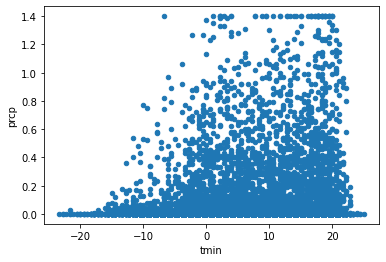

In [26]:
num.plot.scatter(x="tmin",y="prcp")

<AxesSubplot:xlabel='awnd', ylabel='tmax'>

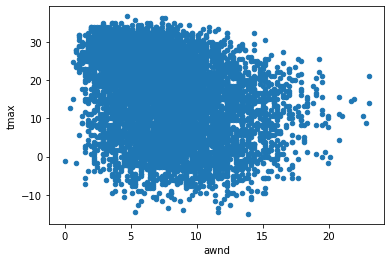

In [37]:
num.plot.scatter(x="awnd",y="tmax")

<AxesSubplot:xlabel='tmax', ylabel='tmin'>

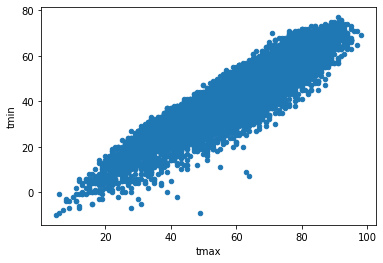

In [19]:
num.plot.scatter(x="tmax",y="tmin")

<AxesSubplot:xlabel='wsf2', ylabel='wdf2'>

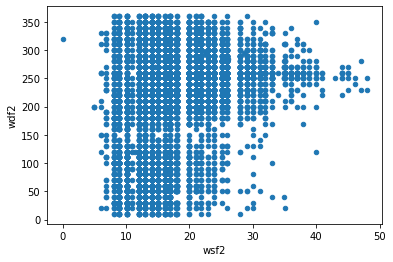

In [18]:
num.plot.scatter(x="wsf2",y="wdf2")

<AxesSubplot:xlabel='wsf2', ylabel='wsf5'>

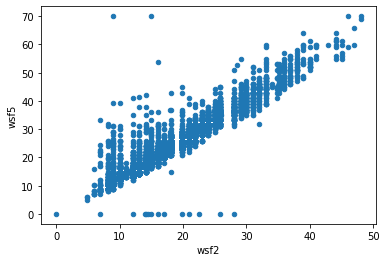

In [14]:
num.plot.scatter(x="wsf2",y="wsf5")

# Tendencias
- el viento tambien tiene un patron
**Viento**: en verano su velocidad estan en minimos y cambia su direccion. Entre diciembre y marzo esta su maximo

el viento tambien tiene un patron

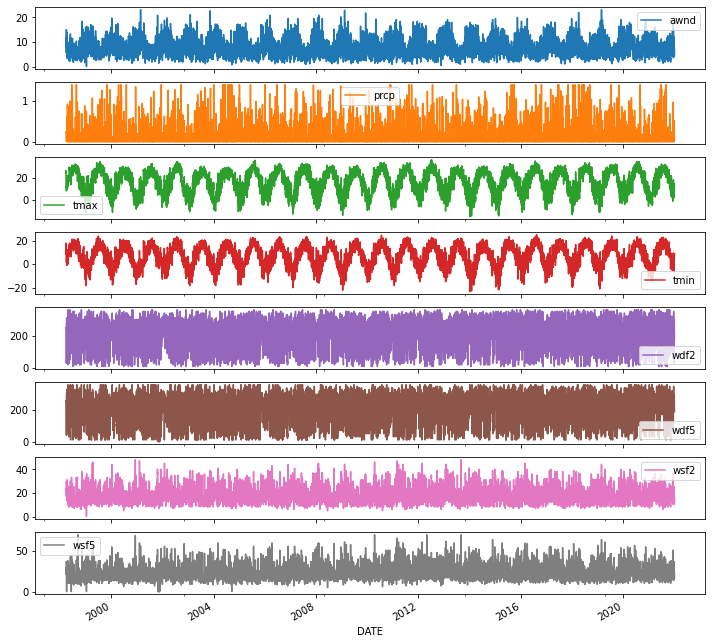

In [35]:
num.plot(subplots=True, figsize = (12,12));

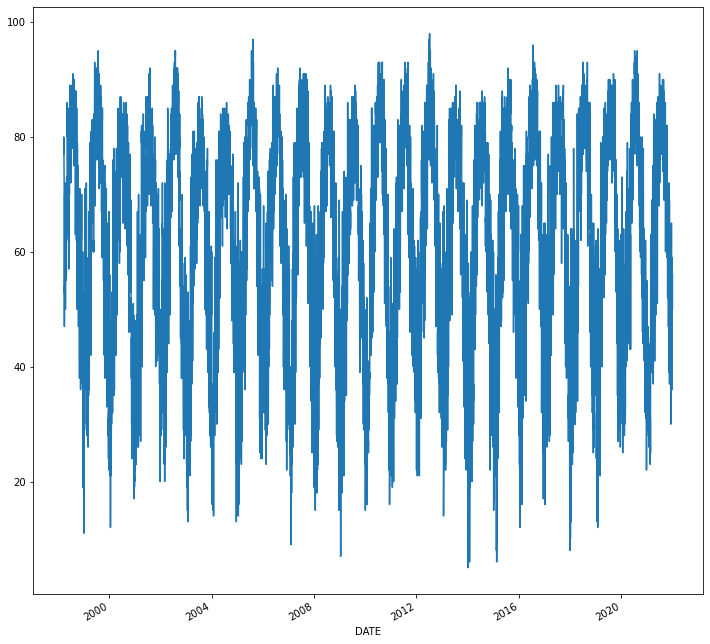

In [13]:
num.tmax.plot(subplots=True, figsize = (12,12));

''

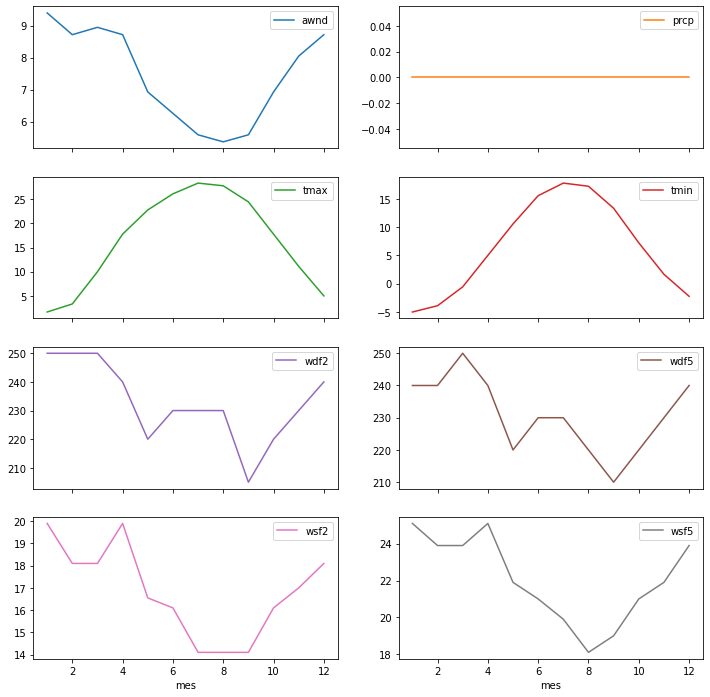

In [45]:
num2 = num.copy()
num2['mes'] = num.index.month
num2.groupby('mes').median().plot.line(subplots=True, figsize = (12,12), layout=(4,2))
;


**Viento**: en verano su velocidad estan en minimos y cambia su direccion

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [7]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [8]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)